# __Workflow stages__
### _The competition solution workflow goes through seven stages described in the Data Science Solutions book._

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.


---

# Workflow goals
The data science solutions workflow solves for seven major goals.

__Classifying.__ We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

__Correlating.__ One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

__Converting.__ For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

__Completing.__ Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

__Correcting.__ We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

__Creating.__ Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

__Charting.__ How to select the right visualization plots and charts depending on nature of the data and the solution goals.

---

# Import modules

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.



In [48]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

# Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.



In [49]:
fname = '../Python code/NYC_Taxi_train.csv'
chunk_size=100000
reader = pd.read_csv(fname, iterator=True)
chunks = []
loop = True
while loop:
    try:
        chunk = reader.get_chunk(chunk_size)
        chunks.append(chunk)
    except StopIteration:
        loop = False
        print("Iteration is stopped")

%time df = pd.concat(chunks, ignore_index=True)


Iteration is stopped
Wall time: 499 ms


# Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

### Which features are available in the dataset?

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the Kaggle data page here.

In [3]:
print(df.columns.values)

['id' 'vendor_id' 'pickup_datetime' 'dropoff_datetime' 'passenger_count'
 'pickup_longitude' 'pickup_latitude' 'dropoff_longitude'
 'dropoff_latitude' 'store_and_fwd_flag' 'trip_duration']


In [4]:
print(df.shape)

(1458644, 11)


---

# Which features are numerical? 
These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

* __Discret:__ vendor_id、passenger_count
* __Continous:__ pickup_longitude、pickup_latitude、dropoff_longitude、store_and_fwd_flag、trip_duration

# Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: 
* __Dichotomous:__ store_and_fwd_flag
* __Nominal:__
* __Ordinal:__


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None


In [5]:
# preview the data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### _check uiqueness_

In [24]:
print(df['vendor_id'].unique())
print(df['passenger_count'].unique())

[2 1]
[1 6 4 2 3 5 0 7 9 8]


---

# Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

# Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [26]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


# Which features contain blank, null or empty values?

These will require correcting.

* Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
* Cabin > Age are incomplete in case of test dataset.

# What are the data types for various features?

Helping us during converting goal.

* Seven features are integer or floats. Six in case of test dataset.
* Five features are strings (object).

In [10]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

trip_duration         0.0
store_and_fwd_flag    0.0
dropoff_latitude      0.0
dropoff_longitude     0.0
pickup_latitude       0.0
pickup_longitude      0.0
passenger_count       0.0
dropoff_datetime      0.0
pickup_datetime       0.0
vendor_id             0.0
id                    0.0
dtype: float64

# Quick summary

##  <span style = 'color:green'>__What is the distribution of numerical feature values across the samples?__</span>

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

> * Total samples are 14523450 or 40% of the actual number of passengers on board the Titanic (2,224).
> * tripduration is a categorical feature with 0 or 1 values.
> * Around 38% samples survived representative of the actual survival rate at 32%.
> * Most passengers (> 75%) did not travel with parents or children.
> * Nearly 30% of the passengers had siblings and/or spouse aboard.
> * Fares varied significantly with few passengers (<1%) paying as high as $512.
> * Few elderly passengers (<1%) within age range 65-80.

In [9]:
print(df.describe())

          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01

# Handling outlier

> * lower inner fence: Q1 - 1.5*IQ
> * upper inner fence: Q3 + 1.5*IQ
> * lower outer fence: Q1 - 3*IQ
> * upper outer fence: Q3 + 3*IQ

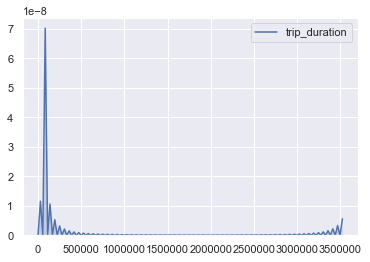

In [22]:
sns.kdeplot(df['trip_duration'], shade=True);

In [50]:
Q3 = df.trip_duration.quantile(0.75) #四分位
Q1 = df.trip_duration.quantile(0.25) #四分位
iqr = Q3-Q1
lower_bound = Q1-(iqr*1.5)
upper_bound = Q3+(iqr*1.5)
                           
df_corr = df[(df['trip_duration'] <= upper_bound) & (df['trip_duration'] >= lower_bound)]


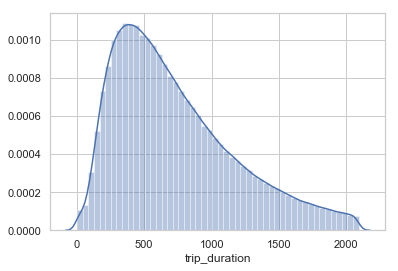

In [51]:
# sns.kdeplot(df_corr['trip_duration'], shade=True);
sns.distplot(df_corr['trip_duration']);

---

# What is the distribution of categorical features?

> * Names are unique across the dataset (count=unique=891)
> * Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
> * Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
> * Embarked takes three possible values. S port used by most passengers (top=S)
> * Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [30]:
df.describe(include=['O'])

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id3053580,2016-01-12 18:48:44,2016-05-16 19:40:28,N
freq,1,5,5,1450599


### __value_counts__

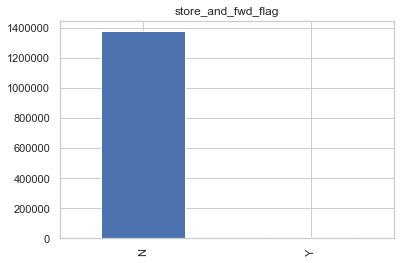

In [44]:
df_corr.store_and_fwd_flag.value_counts().plot(kind="bar",title="store_and_fwd_flag")

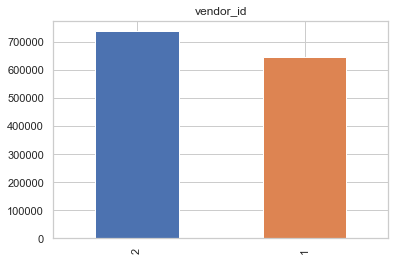

In [43]:
df_corr.vendor_id.value_counts().plot(kind="bar",title="vendor_id")

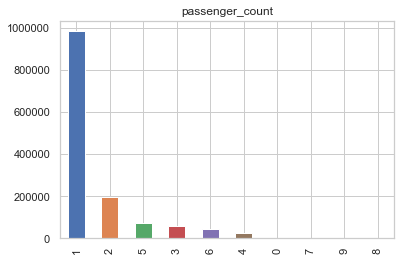

In [42]:
df_corr.passenger_count.value_counts().plot(kind="bar",title="passenger_count")

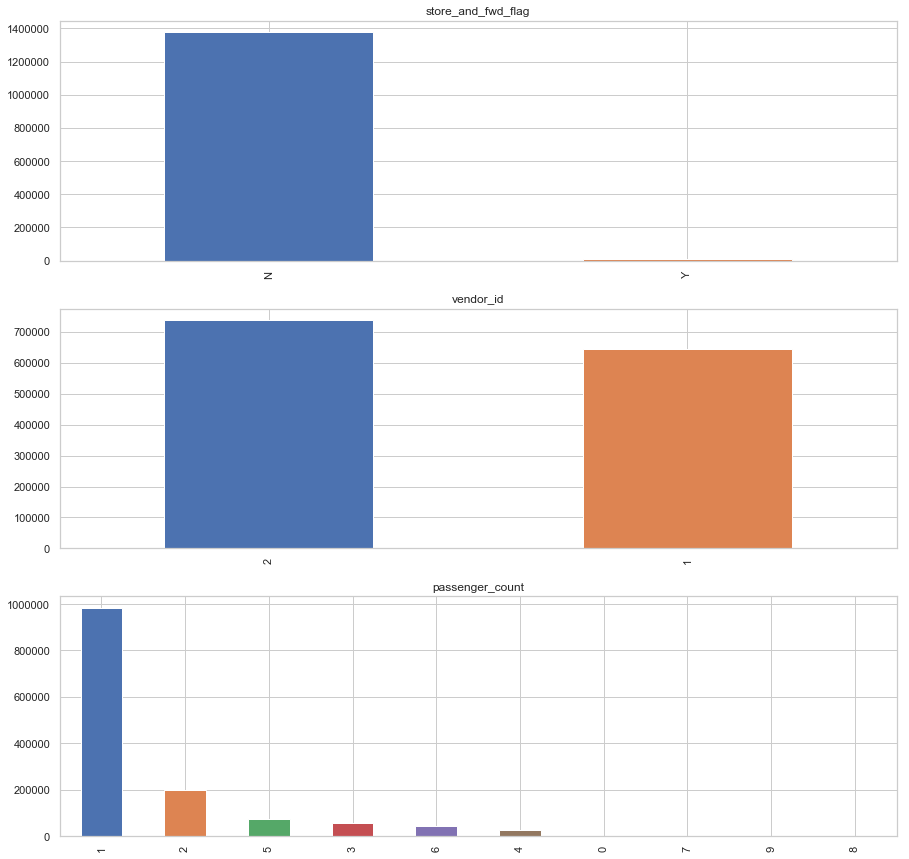

In [57]:
fig, axes = plt.subplots(3,1,figsize=(15,15))
df_corr.store_and_fwd_flag.value_counts().plot(kind="bar",title="store_and_fwd_flag",ax=axes[0])
df_corr.vendor_id.value_counts().plot(kind="bar",title="vendor_id",ax=axes[1])
df_corr.passenger_count.value_counts().plot(kind="bar",title="passenger_count",ax=axes[2])

# What is the distribution of numerical features?

> * Names are unique across the dataset (count=unique=891)
> * Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
> * Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
> * Embarked takes three possible values. S port used by most passengers (top=S)
> * Ticket feature has high ratio (22%) of duplicate values (unique=681).

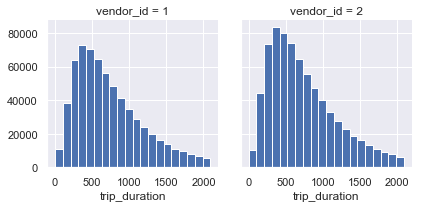

In [9]:
g = sns.FacetGrid(df_corr, col='vendor_id')
g.map(plt.hist, 'trip_duration', bins=20)

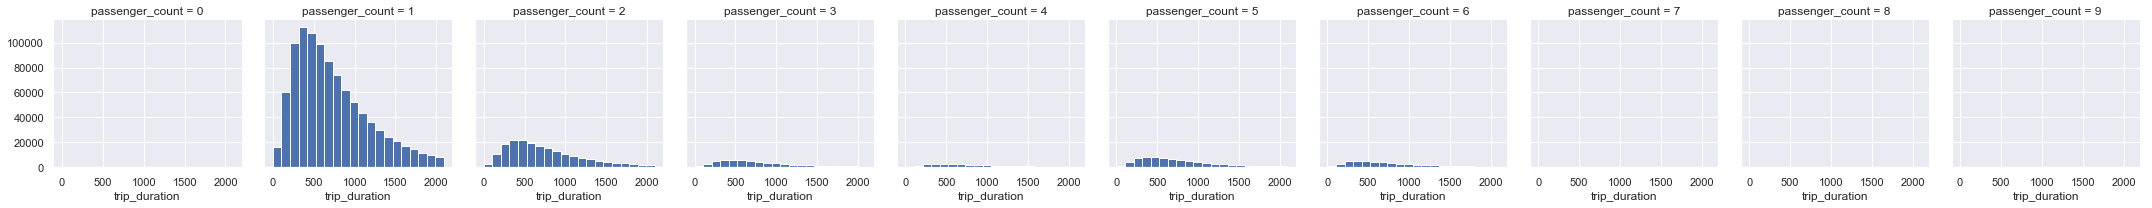

In [10]:
g = sns.FacetGrid(df_corr, col='passenger_count')
g.map(plt.hist, 'trip_duration', bins=20)

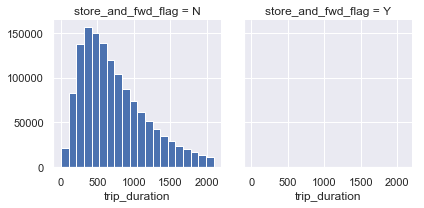

In [11]:
g = sns.FacetGrid(df_corr, col='store_and_fwd_flag')
g.map(plt.hist, 'trip_duration', bins=20)

# Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (__store_and_fwd_flag__), ordinal (__vendor_id__) or discrete (__passenger_count__) type.

* __store_and_fwd_flag__ We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* __vendor_id__ We confirm the observation during problem definition that Sex=female had very high survival rate at 74%
* __passenger_count__ These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [36]:
df_corr[['store_and_fwd_flag', 'trip_duration']].groupby(['store_and_fwd_flag'], as_index=False)\
.mean().sort_values(by='trip_duration', ascending=False)

,store_and_fwd_flag,trip_duration
1,Y,808.822622
0,N,731.307071


In [37]:
df_corr[['vendor_id', 'trip_duration']].groupby(['vendor_id'], as_index=False)\
.mean().sort_values(by='trip_duration', ascending=False)

,vendor_id,trip_duration
1,2,733.800582
0,1,729.303111


In [45]:
df_corr[['passenger_count', 'trip_duration']].groupby(['passenger_count'], as_index=False)\
.mean().sort_values(by='trip_duration', ascending=False)

,passenger_count,trip_duration
4,4,756.823465
3,3,753.771491
2,2,751.277992
5,5,736.691839
6,6,731.013055
1,1,725.514687
9,9,560.000000
0,0,170.000000
8,8,104.000000
7,7,19.666667


# Multi-variables analysis
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

## <span style = 'color:green'>Observations.</span>

Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.

## <span style = 'color:green'>Decisions.</span>

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

We should consider Age (our assumption classifying #2) in our model training.
Complete the Age feature for null values (completing #1).
We should band age groups (creating #3).

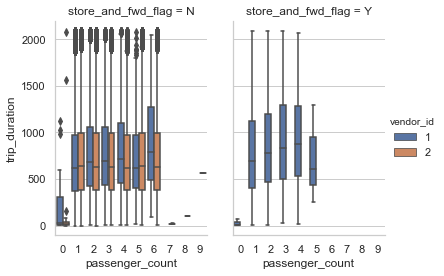

In [46]:
import seaborn as sns
sns.set(style="whitegrid")

# ax = sns.boxplot(x="passenger_count", y="trip_duration", data=df_corr)
# ax = sns.boxplot(x="passenger_count", y="trip_duration", hue="vendor_id",\
#                   data=df_corr, palette="Set3")

g = sns.catplot(x="passenger_count", y="trip_duration",\
                 hue="vendor_id", col="store_and_fwd_flag",\
                 data=df_corr, kind="box",\
                 height=4, aspect=.7);